**CAPSTONE PROJECT BY AINA FARINA**

**Main Objective:** To identify patterns which indicate if a client has a high possibility to switch to another telecom service provider 
<br>
<br>    •	The company wants to understand the driving factors (or driver variables) behind customer churning
<br>    •	Research a little about telecom industry, their services, the customer behaviour patterns and the market dynamics

**Expected Results:**
<br>
<br>    •	Code Functionality all the code in the submitted notebook is functional without error produced
<br>    •	The notebook is well structured with comments
<br>    •	The project uses univariate analysis in the EDA process
<br>    •	The project uses bivariate analysis in the EDA process
<br>    •	The project uses multivariate analysis in the EDA process
<br>    •	The project involved proper use of at least 20 different analyses and metrics(e.g. mean, mode, median, plots, correlations etc.)
<br>    •	Charts and plots are used properly in the analysis and at least 5 visualizations should be involved in the analysis. (correct choices of charts, plots, and labeling)
<br>    •	Clear and well-defined research questions and findings in the project are mentioned and explained. At least 3 questions and findings are needed.
<br>    •	The conclusions are drawn logically and reasonably without logic fallacy.
<br>    •	The project included potential actions or next steps that could be taken, based on the analysis


**Business Understanding:**

This case study aims to identify patterns which indicate if a client has a high possibility to switch to another telecom service provider. 

In other words, the company wants to understand the **driving factors (or driver variables) behind customer churning.** The company can utilise this knowledge for **customer retention, loyalty programs and special offers for existing customers.** 

To develop your understanding of the domain, you are advised to independently research a little about telecom industry, their services, the customer behaviour patterns and the market dynamics. 

**Research Questions based on initial hypothesis**

1. Is there a relationship between a customer's tenure and their likelihood to churn based on their monthly charges? For example, do customers with high monthly charges who have been with the telco for a short period of time have a higher churn rate compared to those with low charges who have been with the telco for a longer period of time?

2. How do monthly charges differ between customers who churned and those who didn't, based on their contract type?

3. How does the relationship between monthly charges and churn differ between customers with different internet service types?

4. How does the relationship between monthly charges and churn differ between customers with streaming TV or not streaming TV?

5. How does the relationship between monthly charges and churn differ between customers with streaming movies or not streaming movies?

> **1. Import Python Libraries**

In [91]:
##for data manipulation 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

##for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

> **2. Fetch Dataset**

In [2]:
dfraw = pd.read_csv('C:/Users/farina/Documents/work/training/14. CADS/08. Capstone/Telco-Customer-Churn.csv')

## check data
dfraw.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


> **3. Exploratory Data Analysis**

**1. How big is the data?**

In [3]:
## shape of dataset
dfraw.shape

(7043, 21)

**2. What type of data is in the dataset?**

In [4]:
## datatype of column and basic info on dataset
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1. There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
2. There are 7043 rows in entire data set
3. Churn is the target variable

In [5]:
## summarize dataset statistical properties

dfraw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**SeniorCitizen** seems to be a categorical features since quartile data (25%, 75%) but min is at 0, max is at 1. This suggests that the feature is a binary of 0,1. 

From the table above also it is observed that consumers are averaged to tenure for 32 months (presumably months as it is not clarified in the training material) and consumers are average to pay RM 64.76 monthly. 

In [6]:
value_counts = dfraw.select_dtypes(include='object').nunique()

for i in dfraw.select_dtypes(include='object').columns[1:]:
    print(f"{i}:")
    print(f"Category values: {dfraw[i].unique()}")
    print(f"Category Count: {value_counts[i]}\n")

gender:
Category values: ['Female' 'Male']
Category Count: 2

Partner:
Category values: ['Yes' 'No']
Category Count: 2

Dependents:
Category values: ['No' 'Yes']
Category Count: 2

PhoneService:
Category values: ['No' 'Yes']
Category Count: 2

MultipleLines:
Category values: ['No phone service' 'No' 'Yes']
Category Count: 3

InternetService:
Category values: ['DSL' 'Fiber optic' 'No']
Category Count: 3

OnlineSecurity:
Category values: ['No' 'Yes' 'No internet service']
Category Count: 3

OnlineBackup:
Category values: ['Yes' 'No' 'No internet service']
Category Count: 3

DeviceProtection:
Category values: ['No' 'Yes' 'No internet service']
Category Count: 3

TechSupport:
Category values: ['No' 'Yes' 'No internet service']
Category Count: 3

StreamingTV:
Category values: ['No' 'Yes' 'No internet service']
Category Count: 3

StreamingMovies:
Category values: ['No' 'Yes' 'No internet service']
Category Count: 3

Contract:
Category values: ['Month-to-month' 'One year' 'Two year']
Category

It seems that 16 of the categorical variables are true (of which need to be encoded for further analysis). The feature **TotalCharges** is observed to be a numerical feature but is categorised as an object. This needs to be corrected. 

From here, we know the following steps for preprocessing: 

1. Drop customerID as it is not needed for analysis
2. Change datatype for TotalCharges
3. Change dtype for SeniorCitizen
3. Encode target feature CHURN 
4. Encode 15 categorical features 

**3. Preprocessing Data**

In [7]:
## dropping column customerID

df = dfraw.drop('customerID', axis=1)

In [8]:
## change datatype for TotalCharges

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [9]:
## change datatype for SeniorCitizen

df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [10]:
## check for missing values

df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in TotalCharges. Since it is only less than 0.15% of the whole dataset, i will just drop the missing values row. 

In [11]:
##drop missing values
df.dropna (how = 'any', inplace = True)

In [12]:
df.shape

(7032, 20)

In [13]:
##describe for numerical columns
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [14]:
## encode churn and othe categorical features

##first to group columns by type - categorical and numerical
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns = categoric_columns[:-1]

In [15]:
#label encode

le = LabelEncoder()

df1 = df.copy()

df1[['Churn']] = df1[['Churn']].apply(le.fit_transform)

In [16]:
#check df
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
#check for duplicate values

print('No of duplicated values in df: ', df1.duplicated().sum())

No of duplicated values in df:  22


In [18]:
#since low number of rows, we drop the duplicated values

df1. drop_duplicates(inplace=True)

In [19]:
df1.shape

(7010, 20)

**4. Distribution of Target Feature: Churn**

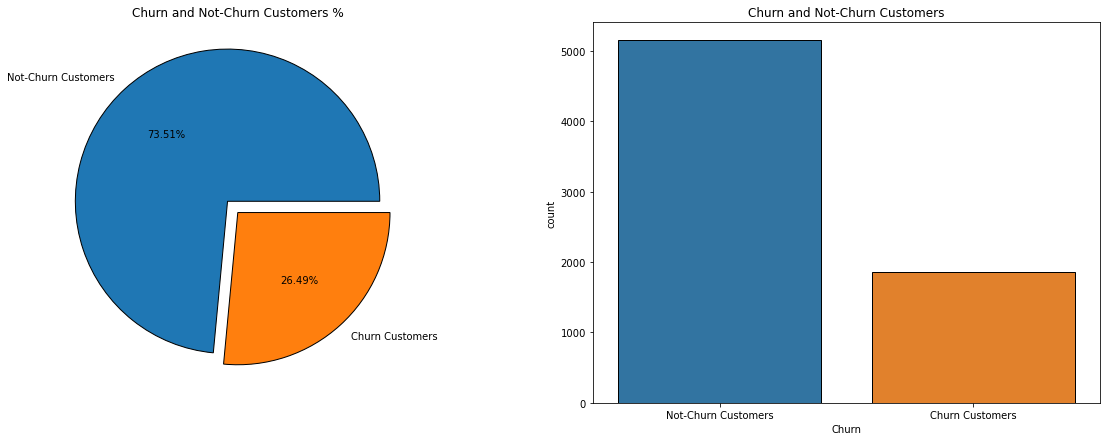

In [20]:
##visualise the distribution of CHURN

churn_count = list(df1['Churn'].value_counts())
pie_values = [churn_count[0] / sum(churn_count) * 100, churn_count[1] / sum(churn_count) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = df1, 
                   x='Churn',
                   edgecolor = 'black')
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()

In [21]:
##finding ratio of imbalance

imbalance_ratio = churn_count[0] / churn_count[1]

print("Ratio of data imbalance: ", imbalance_ratio)

Ratio of data imbalance:  2.774905761981691


From the graphs above, customers who did not churn is much higher at 73.51% while customers who did churn is at 26.49%. In addition, there is an obvious data imbalance whereby ratio of imbalance is at 1:2.77

**5. Checking for Outliers in Numerical Columns**

In [22]:
def IQR_method (df1,n,features):
    
    outlier_list = []
    
    for column in features:
        Q1 = np.percentile(df1[column], 25)
        Q3 = np.percentile(df1[column],75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df1[(df1[column] < Q1 - outlier_step) | (df1[column] > Q3 + outlier_step )].index
        outlier_list.extend(outlier_list_column)
        
## selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
## Calculate the number of records below and above lower and above bound value respectively
    out1 = df1[df1[column] < Q1 - outlier_step]
    out2 = df1[df1[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [24]:
Outliers_IQR = IQR_method(df1,1,numeric_columns)

Total number of deleted outliers is: 0


From here, we see that there are no outliers in the dataset, hence we do not need to correct this.

**6. Analysis - Numerical Columns**

In [25]:
#check basic statistic data for numeric columns

df1[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7010.000000,7010.000000,7010.000000
mean,32.520399,64.888666,2290.353388
std,24.520441,30.064769,2266.820832
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,408.312500
50%,29.000000,70.400000,1403.875000
75%,56.000000,89.900000,3807.837500
max,72.000000,118.750000,8684.800000


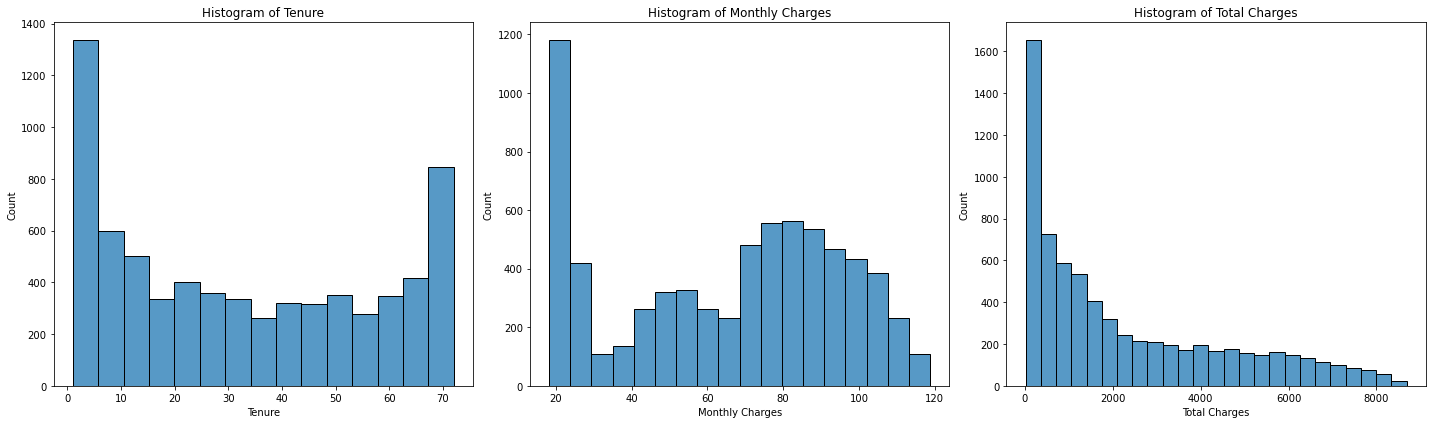

In [26]:
##visualise distribution
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,6))

sns.histplot(df1['tenure'], ax=ax[0])
ax[0].set_title("Histogram of Tenure")
ax[0].set_xlabel("Tenure")
ax[0].set_ylabel("Count")

sns.histplot(df1['MonthlyCharges'], ax=ax[1])
ax[1].set_title("Histogram of Monthly Charges")
ax[1].set_xlabel("Monthly Charges")
ax[1].set_ylabel("Count")

sns.histplot(df1['TotalCharges'], ax=ax[2])
ax[2].set_title("Histogram of Total Charges")
ax[2].set_xlabel("Total Charges")
ax[2].set_ylabel("Count")

plt.tight_layout()
plt.show()


In [27]:
##check median of feature

tenure_med = statistics.median(df1['tenure'])
moncharge_med = statistics.median(df1['MonthlyCharges'])
totcharge_med = statistics.median(df1['TotalCharges'])

print("Median for Tenure: ", tenure_med)
print("Median for Monthly Charges: ", moncharge_med)
print("Median for Total Charges: ", totcharge_med)

Median for Tenure:  29.0
Median for Monthly Charges:  70.4
Median for Total Charges:  1403.875


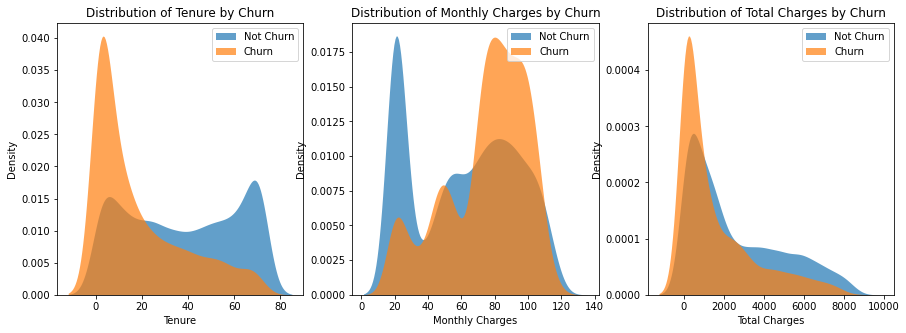

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# set common properties for all subplots
props = { "fill": True, "alpha": .7, "linewidth": 0}

# loop through the three variables and plot kde plots in each subplot
vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
titles = ['Tenure', 'Monthly Charges', 'Total Charges']
for i, var in enumerate(vars):
    sns.kdeplot(df1[var][(df1["Churn"] == 0)], ax=ax[i], **props)
    sns.kdeplot(df1[var][(df1["Churn"] == 1)], ax=ax[i], **props)
    ax[i].legend(["Not Churn","Churn"], loc='upper right')
    ax[i].set_ylabel('Density')
    ax[i].set_xlabel(titles[i])
    ax[i].set_title(f"Distribution of {titles[i]} by Churn")

plt.show()

From the analysis above: 
<br>
<br>**1. Tenure**
<br>
<br>a.  The highest populated tenure in this dataset is less than 10 months. Of which means that most of the consumers have a tenure of less than 10 months. 
<br>b.  The second highest popular tenure is around 70 months (around 6 years). This shows that there are high number of consumers that are loyal with the telco for about 6 years. 
<br>c.  The least popular tenure is around 40 months (around 3 years). This shows that there are not many customers that have a tenure of around 40 months. 
<br>d.  Though the average tenure is at 32.5 months, the median is at a lower value of 29 months. Since the database is larger in lower tenure values, the median is more accurate to represent the "average" value for tenure. 

<br>The customer database is larger in new customers (of less than 10 months), though there is also a fair amount of loyal customers (of around 70 months). 
<br>The churn rate is higher in lower term of tenure. 

<br>**2. Monthly Charges**
<br>The most populated monthly charge in the customer database is around RM20. This shows that a significant amount of customers have lower monthly charges. 
<br> the churn rate is however higher in more expensive monthly charges.

<br>**3. Total Charges**
<br>We observe that the distribution is highly skewed to the right. This means that the most of the customers have lower total charges.
<br>The churn rate is higher in low total charges. 

Based on the above observations, the churn rate is highly likely higher among users that have low term tenure, higher monthly charges yet lower total charges. 


____________

**7. Analysis - Customer Profile**

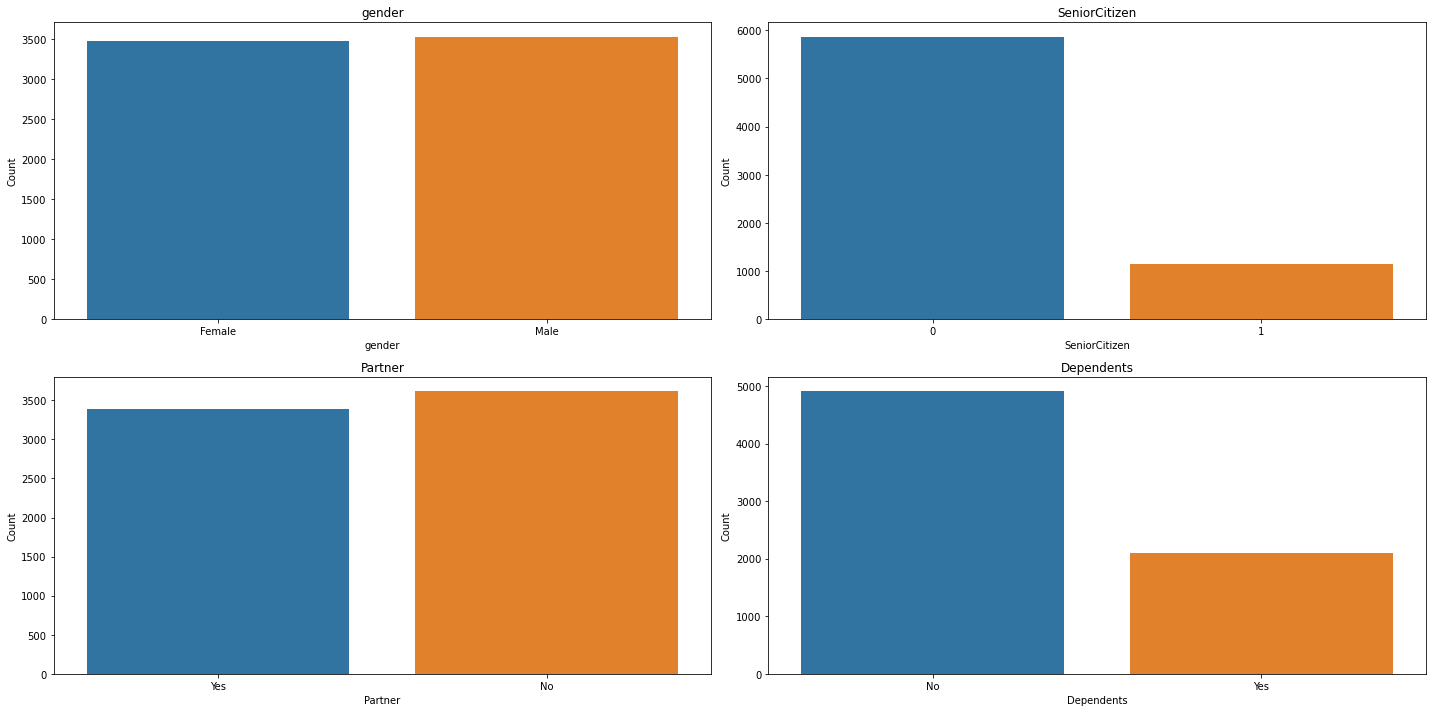

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

demog = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# loop through the categorical variables and plot a countplot in each subplot
for i, var in enumerate(demog):
    row = i // 2
    col = i % 2
    sns.countplot(x=df1[var], ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

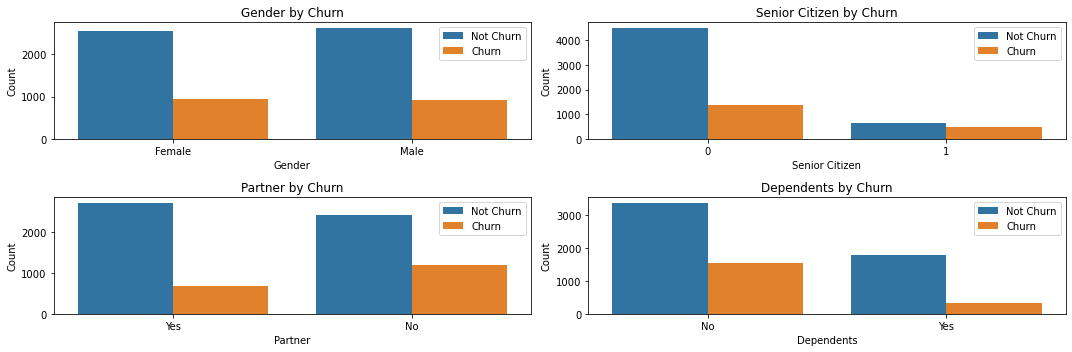

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(15, 5))

titles = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

ax = ax.flatten()

for i, var in enumerate(demog):
    sns.countplot(x=var, hue="Churn", data=df1, ax=ax[i])
    ax[i].legend(["Not Churn","Churn"], loc='upper right')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(titles[i])
    ax[i].set_title(f"{titles[i]} by Churn")

plt.tight_layout()
plt.show()

Based the customer information, 

<br>**1. Gender**: 
<br>The number of female and male customers are fairly equal and balanced. 
<br>The churn rate for both female and male rate are fairly the same but female is slightly higher.
<br>**2. Senior Citizen**: 
<br>A significant amount of consumers are not senior citizens. 
<br>The churn rate is higher for non senior citizens.
<br>**3. Partner**: 
<br>Customers without partner and with partner are about the same count though customers without a partner has a slightly higher count. 
<br>The churn rate for customers without partners are slightly higher than compared to customers with a partner
<br>**4. Dependents**: 
<br>Majority of customers do not have any dependents in comparison to the number of customers who do have dependents.
<br>The churn rate for customers without dependents are significantly higher than compared to customers with a dependent

Based on the above observations, the churn rate is highly likely higher among young female that does not have a partner and any dependents. 

----------------


**8. Analysis - Services Provided**

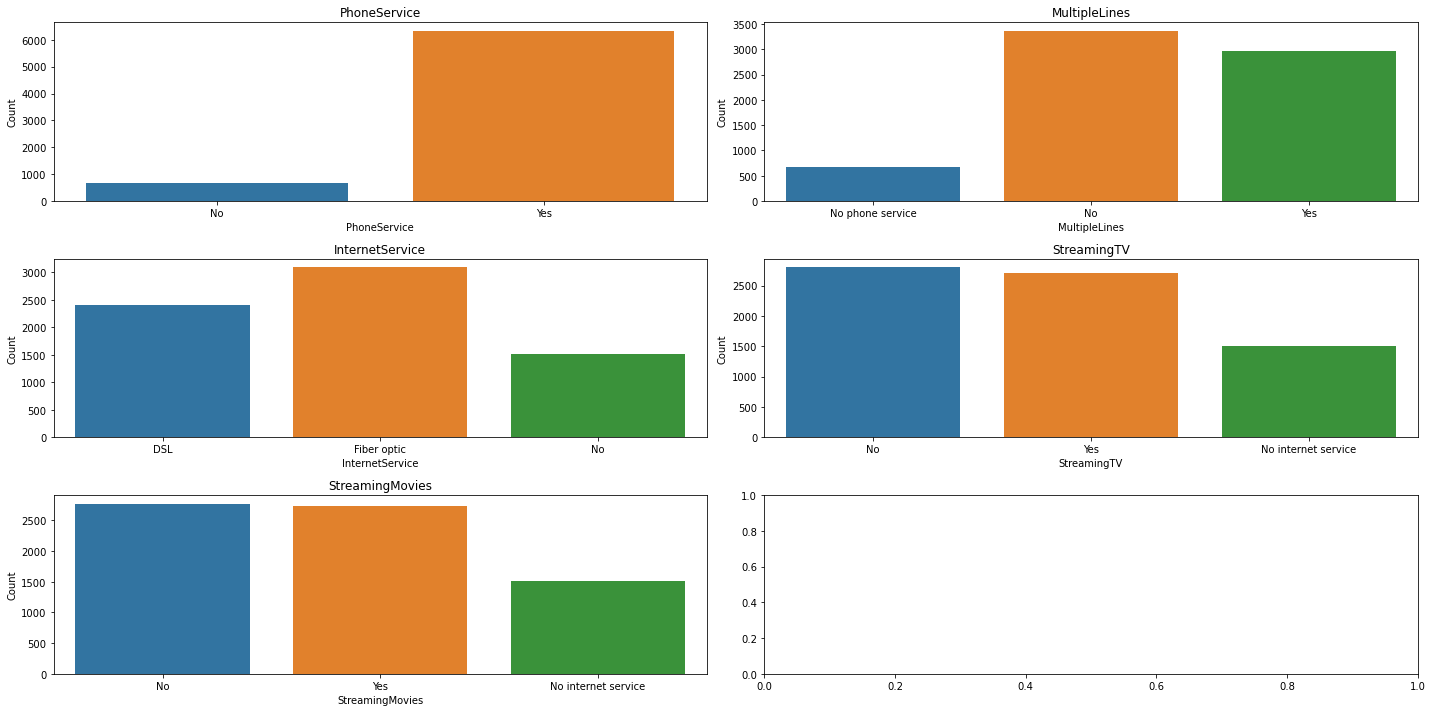

In [31]:
fig, ax = plt.subplots(3, 2, figsize=(20,10))

ser_prov = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']

for i, var in enumerate(ser_prov):
    row = i // 2
    col = i % 2
    sns.countplot(x=df1[var], ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()


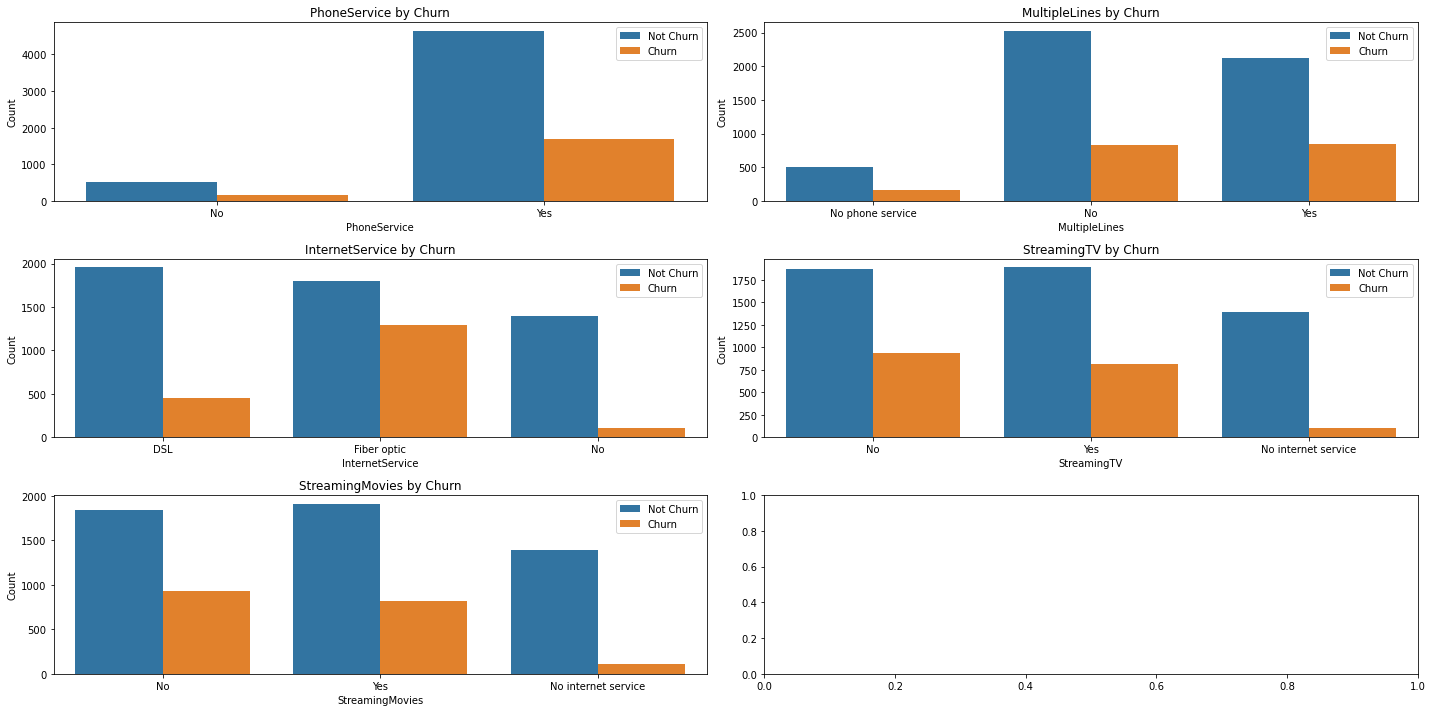

In [32]:
fig, ax = plt.subplots(3, 2, figsize=(20, 10))

titles = ['PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies']

ax = ax.flatten()

for i, var in enumerate(ser_prov):
    sns.countplot(x=var, hue="Churn", data=df1, ax=ax[i])
    ax[i].legend(["Not Churn","Churn"], loc='upper right')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(titles[i])
    ax[i].set_title(f"{titles[i]} by Churn")

plt.tight_layout()
plt.show()

Based the services provided, 

<br>**1. Phone Service**: 
<br>Most of the customers have phone service. 
<br>The churn rate is higher for customers that have Phone services.
<br>**2. Mulitple Lines**: 
<br>Customer base is split almost evenly but those that do not have multiple lines are larger in comparison to those that do have multiple lines 
<br>The churn rate for users that have/dont have multiple lines are fairly the same.
<br>**3. Internet Service**: 
<br>Majority of customers have Fiber optic, followed by DSL, and the rest do not have internet service. 
<br>The churn rate is higher among users that use fiber optic. 
<br>**4. Streaming TV**: 
<br>Out of those that have Internet services, those that stream TV are slightly smaller in count in comparison to those that don't stream TV.
<br>The churn rate is higher among users that do not stream TV
<br>**5. Streaming Movies**: 
<br>Out of those that have Internet services, those that stream movies are slightly smaller in count in comparison to those that don't stream movies.
<br>The churn rate is higher among users that do not stream movies. 

Based on the above observations, the churn rate is highly likely higher among users that have phone service, use fiber optic, but does not stream TV or movies. Having/Not Having multiple lines is not significant to the churn rate. 

----------------

**9. Analysis - Support Services**

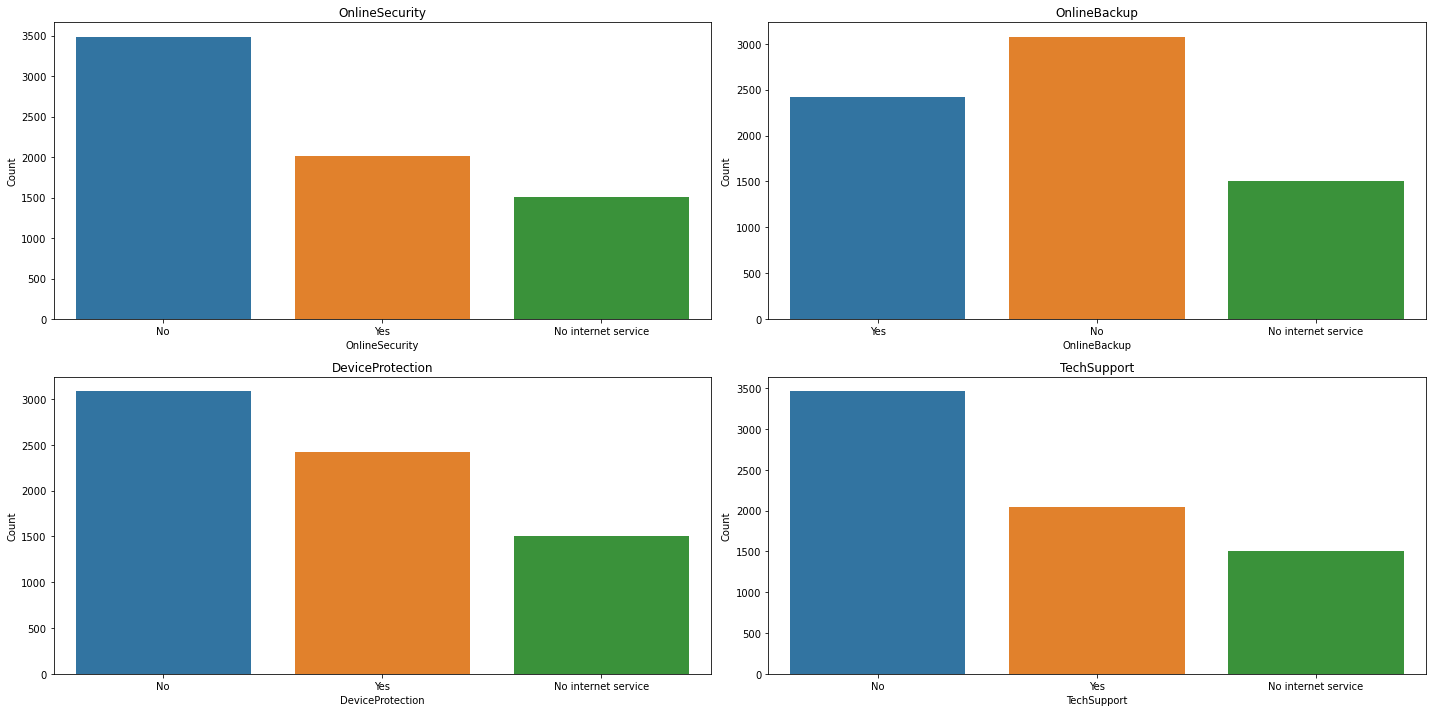

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

support = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for i, var in enumerate(support):
    row = i // 2
    col = i % 2
    sns.countplot(x=df1[var], ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

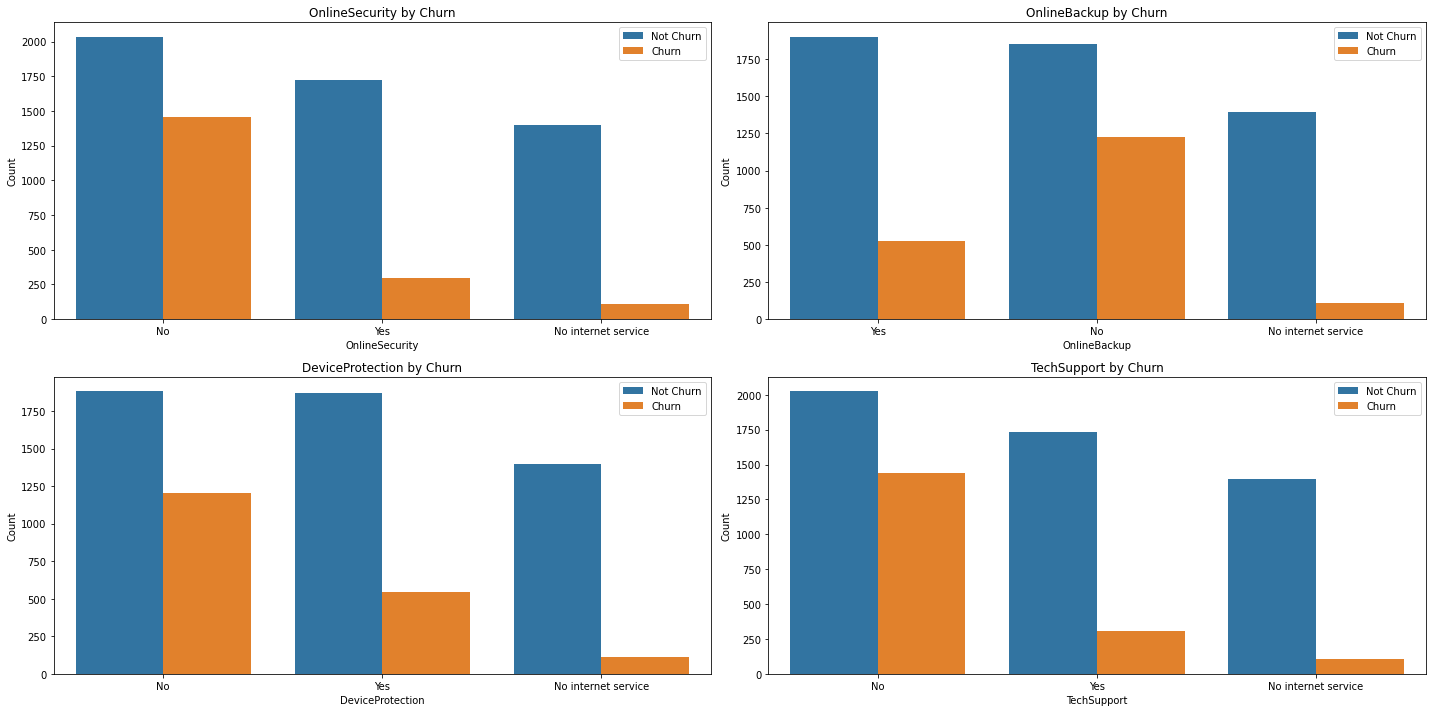

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

titles = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

ax = ax.flatten()

for i, var in enumerate(support):
    sns.countplot(x=var, hue="Churn", data=df1, ax=ax[i])
    ax[i].legend(["Not Churn","Churn"], loc='upper right')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(titles[i])
    ax[i].set_title(f"{titles[i]} by Churn")

plt.tight_layout()
plt.show()

Based the support services, 

<br>**1. Online Security**:
<br>Most of the customers do not have online security.
<br>The churn rate is higher in users that do not have online security
<br>**2. Online Backup**: 
<br>Most of the customers also do not have online backup. 
<br>The churn rate is higher in users that do not have online backup
<br>**3. Device Protection**: 
<br>Majority of customers also do not have device protection.
<br>The churn rate is higher in users that do not have device protection
<br>**4. Tech Support**: 
<br>Most of the customers also do not have Tech support.
<br>The churn rate is higher in users that do not have tech support

Based on the above observations, the churn rate is highly likely higher among users that do not have online security, online backup, device protection and tech support.

----------------

**10. Analysis - Payment**

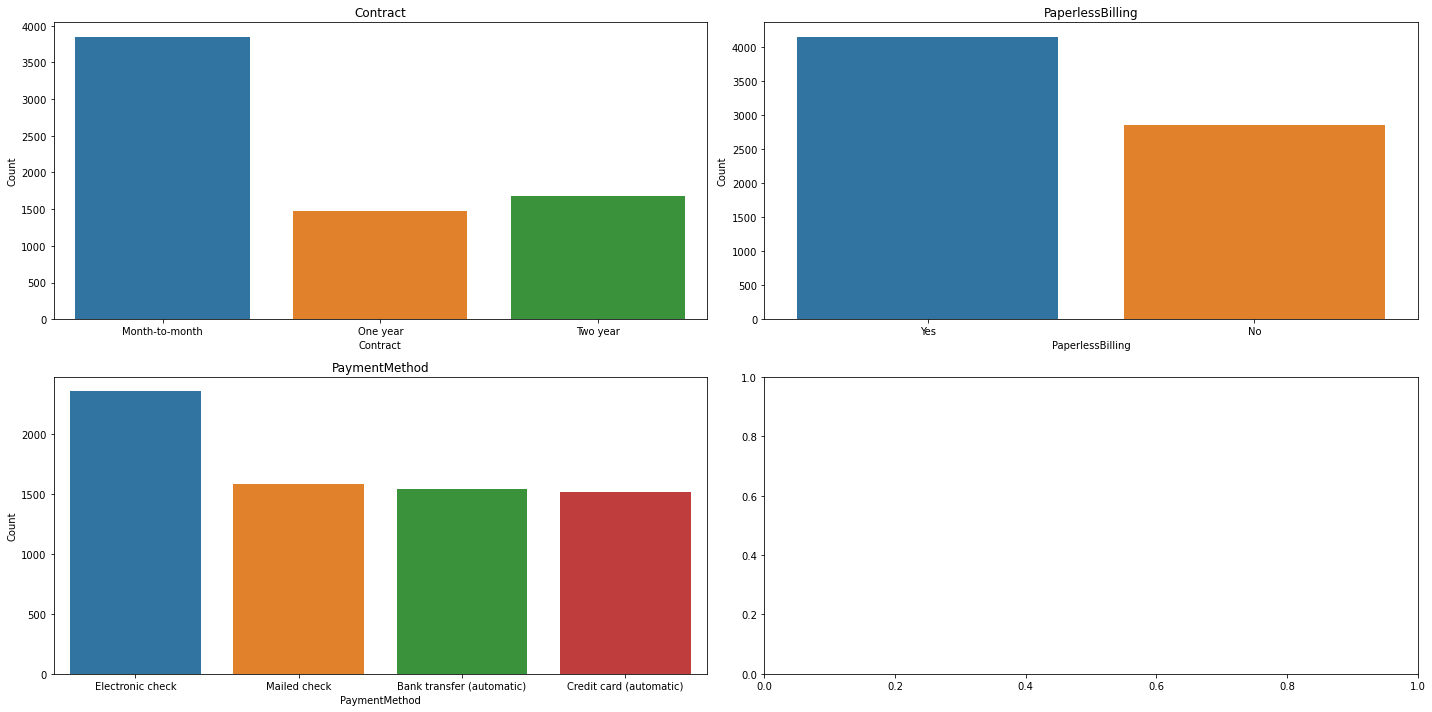

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

payment = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i, var in enumerate(payment):
    row = i // 2
    col = i % 2
    sns.countplot(x=df1[var], ax=ax[row, col])
    ax[row, col].set_title(var)
    ax[row, col].set_xlabel(var)
    ax[row, col].set_ylabel("Count")

plt.tight_layout()
plt.show()

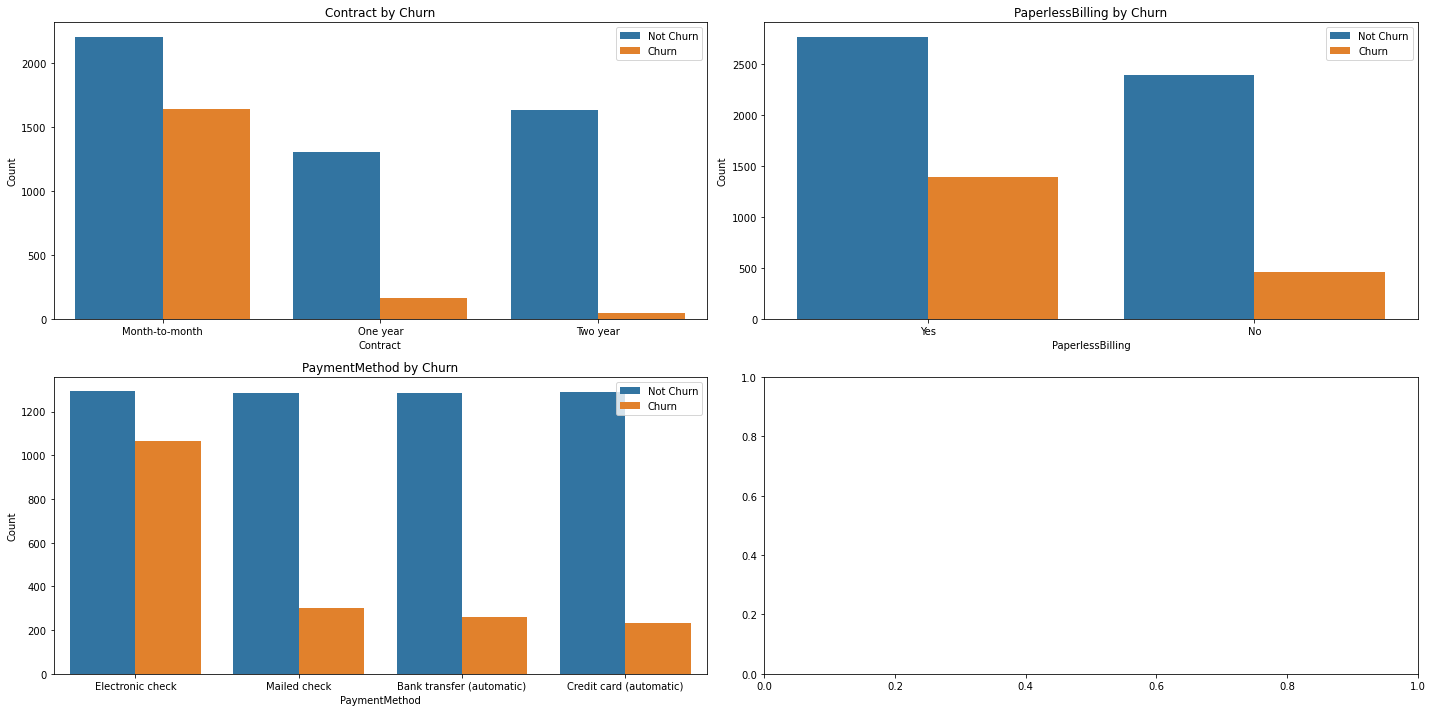

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(20,10))

titles = ['Contract', 'PaperlessBilling', 'PaymentMethod']

ax = ax.flatten()

for i, var in enumerate(payment):
    sns.countplot(x=var, hue="Churn", data=df1, ax=ax[i])
    ax[i].legend(["Not Churn","Churn"], loc='upper right')
    ax[i].set_ylabel('Count')
    ax[i].set_xlabel(titles[i])
    ax[i].set_title(f"{titles[i]} by Churn")

plt.tight_layout()
plt.show()

Based the customer payment info, 

<br>**1. Contract**: 
<br>Most of the customers have month-to-month contract. 
<br>Churn rate is higher among users that have month-to-month contract
<br>**2. Online Backup**: 
<br>Majority of the customers have paperless billing. 
<br>The churn rate is higher among users that have paperless billing.
<br>**3. Device Protection**: 
<br>Majority of customers pay via Electronic check.
<br>The churn rate is higher among users that pay via electronic check.

Based on the observation above, the churn rate is highly likely higher among users that have month-to-month contract, paperless billing and pay via electronic check.

----------------

**11. Correlation**

In [37]:
#label encode other categorical columns

df2 = df1.copy()

df2[categoric_columns] = df2[categoric_columns].apply(le.fit_transform)

In [38]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df2.corr()

<AxesSubplot:>

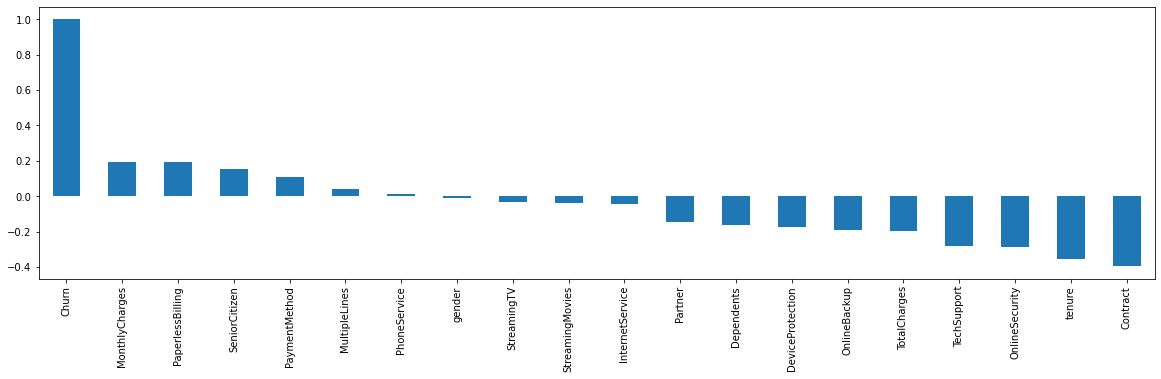

In [39]:
plt.figure(figsize=(16,10)) 
df2.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

Based on the correlation matrix above: 

1. We observe that the monthly charges has a low positive correlation with churn. This shows that as monthly charges increase, churn would also increase. 
2. Contract and tenure however has a low negative correlation with Churn. This shows that as contract or tenure increase, churn would decrease. 
3. These 3 features should be the main focus of telco in understanding churn of customers. 

**12. Multivariate Analysis based on research question**

***1. Is there a relationship between a customer's tenure and their likelihood to churn based on their monthly charges? For example, do customers with high monthly charges who have been with the telco for a short period of time have a higher churn rate compared to those with low charges who have been with the telco for a longer period of time?***

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

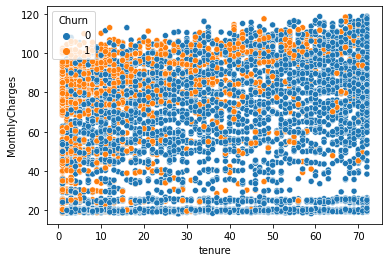

In [74]:
##visualise the distribution of tenure vs monthlycharges vs churn

sns.scatterplot(x='tenure', y = 'MonthlyCharges', hue = 'Churn', data = df2)

In [75]:
##calculate the correlation 

correlation_matrix = df2[['tenure', 'MonthlyCharges','Churn']].corr()
print(correlation_matrix)

                  tenure  MonthlyCharges     Churn
tenure          1.000000        0.244194 -0.353339
MonthlyCharges  0.244194        1.000000  0.194008
Churn          -0.353339        0.194008  1.000000


In [76]:
#lets try to group customers based on their features

grouped_df = df2.groupby(['MonthlyCharges','tenure'])['Churn'].mean().reset_index()
print(grouped_df.head())

   MonthlyCharges  tenure  Churn
0           18.25      28    0.0
1           18.40      59    0.0
2           18.55      36    0.0
3           18.70      25    0.0
4           18.70      53    0.0


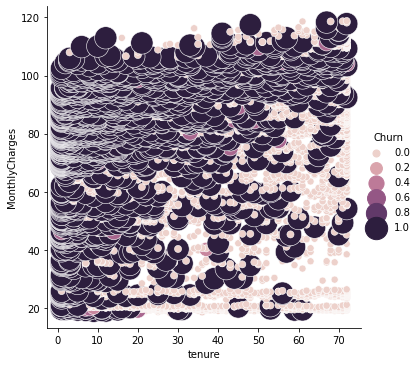

In [77]:
sns.relplot(x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', size = 'Churn', sizes = (50, 500), data = grouped_df)

Customers that have high monthlycharges and low tenure is highly likely to churn while those that have low monthly charges and high tenure is less likely to churn. It is worth noting that those that have lower tenure, regardless of how high or low the monthly charge is, are more likely to churn. 

***2. How do monthly charges differ between customers who churned and those who didn't, based on their contract type?***

<AxesSubplot:xlabel='Contract', ylabel='MonthlyCharges'>

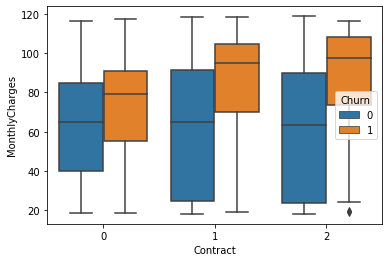

In [85]:
sns.boxplot(x = 'Contract', y = 'MonthlyCharges', hue = 'Churn', data = df2)

Customers that have a 2 year contract have higher monthly charges are the most likely to churn.

***3. How does the relationship between monthly charges and churn differ between customers with different internet service types?***

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

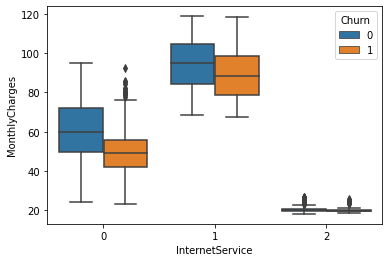

In [102]:
sns.boxplot(x = 'InternetService', y = 'MonthlyCharges', hue = 'Churn', data = df2)

1. Customers that have fiber optics have higher monthly charges, and a higher churn rate. 
2. Customers that have DSL have lower monthly charges and a lower churn rate

***4. How does the relationship between monthly charges and churn differ between customers with streaming TV or not streaming TV?***

<AxesSubplot:xlabel='StreamingTV', ylabel='MonthlyCharges'>

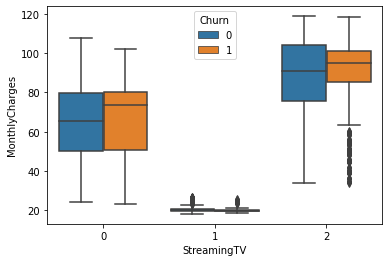

In [112]:
sns.boxplot(x = 'StreamingTV', y = 'MonthlyCharges', hue = 'Churn', data = df2)

##no=0 , yes=2 ,no internet service=1

1. Customers that do stream TV have higher monthly charges and higher churn rate
2. Customers that do not stream TV have slightly lower monthly charges and lower churn rate

***5. How does the relationship between monthly charges and churn differ between customers with streaming TV or not streaming Movies?***

<AxesSubplot:xlabel='StreamingMovies', ylabel='MonthlyCharges'>

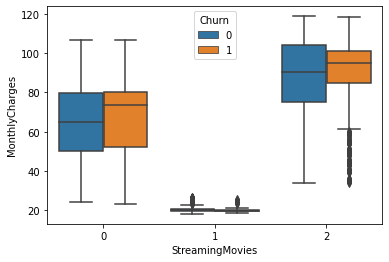

In [113]:
sns.boxplot(x = 'StreamingMovies', y = 'MonthlyCharges', hue = 'Churn', data = df2)

##no=0 , yes=2 ,no internet service=1

1. Customers that do stream movies have higher monthly charges and higher churn rate
2. Customers that do not stream movies have slightly lower monthly charges and lower churn rate

**Additional analysis of pairplot to see if there are other significant patterns with other features**

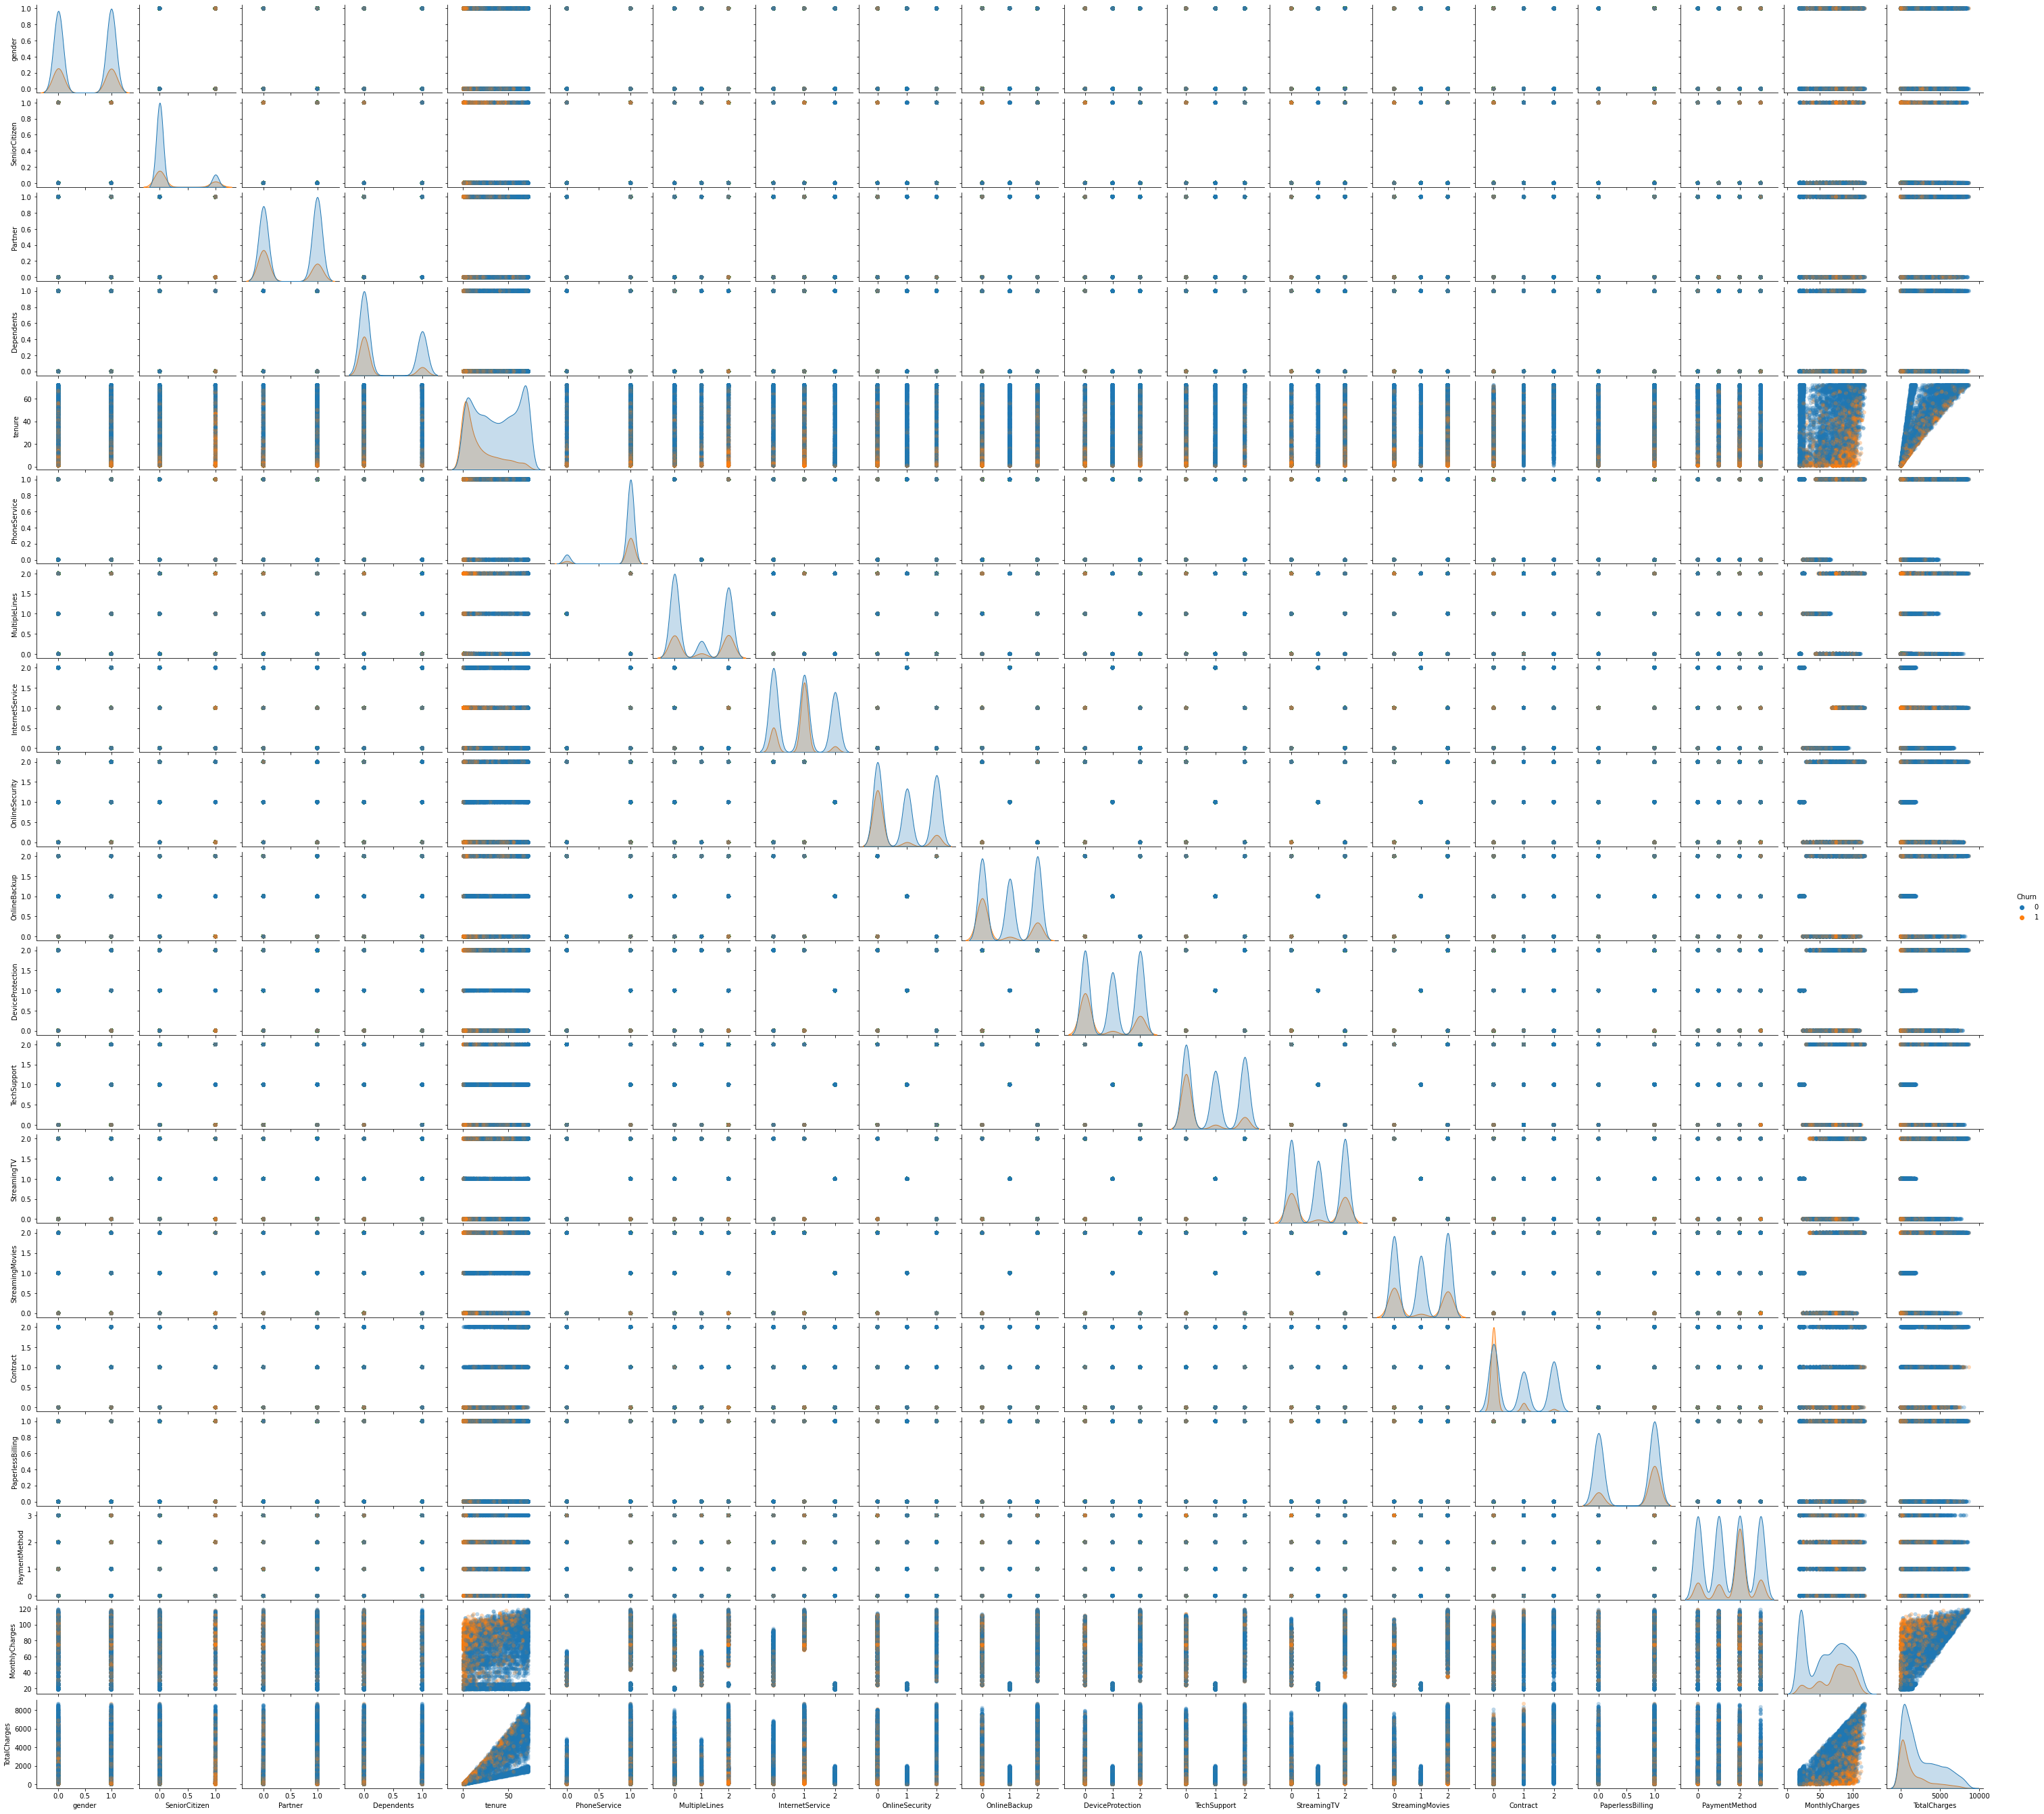

In [114]:
sns.pairplot(df2, hue='Churn', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

From the pairplot, it is observed that: 
1. non senior citizens that have a lower monthly charge have did not churn as much
2. month-to-month contract that have a higher monthly charge has a higher churn count
3. internet service of Fiber optics with low tenure term has a higher churn count

> **4. Conclusion**

1. Based on the analysis, monthly charge is a very strong factor in churn rate of customer. Services provided (i.e stream tv, stream movie, etc.) by telco can increase the monthly charge, whereby increases the likelyhood of customers to churn. Telco can provide promotional offerings/discounts on this service so that monthly charge would not be as high. 
<br>
<br>
2. Not only that, the higher the monthly charges, the shorter customers are staying with telco. In order to retain the users, telco needs customers to stay with the company as longest as possible. This can also be seen in contract that have longer terms (i.e. 2 year) have less customers that churn in comparison to month-to-month contracts. Telco can provide better monthly charge offers for longer contract terms for better customer retention. 
<br>
<br>
3. Customer churn can also be seen among young users that have no partners and dependents. These users are assuming to be of those that have no commitment or just starting out in the workfield. These users are less likely to have stable funds and are able to afford higher monthly charges. Telco needs to focus on this cluster of users to be able to roll out better strategies to reduce churn. This can be done by further analysis or machine learning by clustering the customer database. 
<br>
<br>
4. However, this only shows the factors that come from the customers. Telco also needs to research on external factors such as better prices from the market, better quality of services provided by competitors, etc. 
<br>
<br>
5. Nonetheless, these finding shows glimpse of insight to what can help to reduce churn based on the customer database. 


~Aina Farina